In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import glob
mountFileName = '../../Bureau/IRAP_mount/Generative_Adversarial_Network/matrices_CEGAN/'
localFileName = '../matrices_CEGAN/'
filenamesList = glob.glob('../matrices_CEGAN/base*')
baseMatricesList = np.array(filenamesList)
lastEpoch = np.int16((np.round((baseMatricesList.shape[0]/5)*10,0) - 9) // 10 * 10)
print(baseMatricesList[-1])

../matrices_CEGAN/base_2900_3.npy


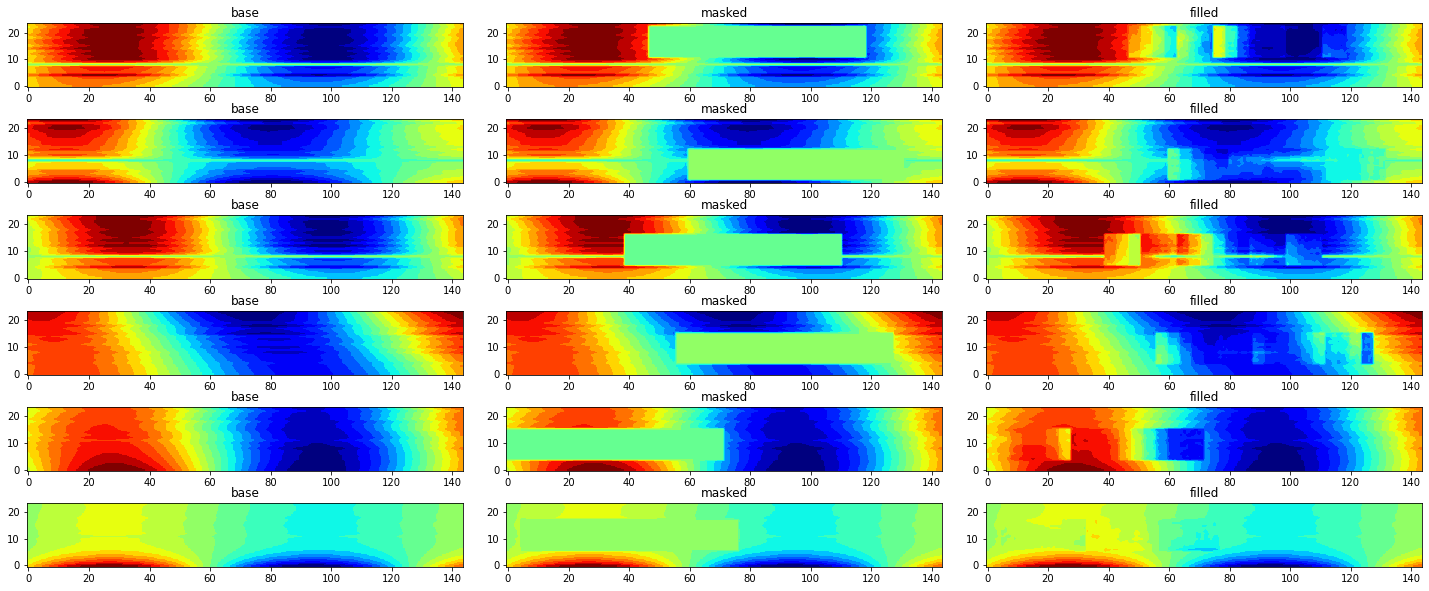

In [8]:
# numberOfFiles=0
# try: 
#     filesXtrain = os.listdir('../matrices_CEGAN/'); 
#     numberOfFiles = len(filesXtrain)/3
# except: print('File not found')
# numberOfFiles-=11

base = np.empty((6,24,144))
filled = np.empty((6,24,144))
masked = np.empty((6,24,144))
epoch = 44000
for i in range(0,6):
    base[i] = np.load('{}base_{}_{}.npy'.format(mountFileName, epoch, i))
    masked[i] = np.load('{}masked_{}_{}.npy'.format(mountFileName, epoch, i))
    filled[i] = np.load('{}filled_{}_{}.npy'.format(mountFileName, epoch, i))

numberOfPlots = 6
fig, axs = plt.subplots(numberOfPlots,3, figsize=(25, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)

axs = axs.ravel().reshape(numberOfPlots,3)
for y in range(numberOfPlots):
        axs[y][0].imshow(base[y], origin='lower', cmap=plt.get_cmap('jet', 20) , aspect='auto')
        axs[y][0].set_title("base")
        axs[y][1].imshow(masked[y], origin='lower', cmap=plt.get_cmap('jet',20) , aspect='auto')
        axs[y][1].set_title("masked")
        axs[y][2].imshow(filled[y], origin='lower', cmap=plt.get_cmap('jet',20) , aspect='auto')
        axs[y][2].set_title("filled")
fig.savefig("CGAN_predictions")

In [17]:
from keras.models import load_model, model_from_json
json_file = open('saved_model_CEGAN/generator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
generator = model_from_json(loaded_model_json)
# load weights into new model
generator.load_weights("saved_model_CEGAN/generator_weights.hdf5")

json_file = open('saved_model_CEGAN/discriminator.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
discriminator = model_from_json(loaded_model_json)
# load weights into new model
discriminator.load_weights("saved_model_CEGAN/discriminator_weights.hdf5")